### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [0]:
trainy=tf.keras.utils.to_categorical(trainY,10)
testy=tf.keras.utils.to_categorical(testY,10)

In [27]:
trainy.shape

(60000, 10)

In [28]:
testy.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32')
testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32')

In [0]:
trainX /=255
testX /=255

In [0]:
model=tf.keras.models.Sequential()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28,1)))

In [0]:
model.add(tf.keras.layers.Dense(200,activation ='relu'))
model.add(tf.keras.layers.Dense(100,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [34]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainy, batch_size=64, epochs=100, 
              validation_data=(testX, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5300 - acc: 0.8111 - val_loss: 0.4006 - val_acc: 0.8555
Epoch 2/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3827 - acc: 0.8608 - val_loss: 0.3812 - val_acc: 0.8609
Epoch 3/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3446 - acc: 0.8744 - val_loss: 0.3589 - val_acc: 0.8667
Epoch 4/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3189 - acc: 0.8821 - val_loss: 0.3470 - val_acc: 0.8742
Epoch 5/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3064 - acc: 0.8868 - val_loss: 0.3573 - val_acc: 0.8699
Epoch 6/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2889 - acc: 0.8929 - val_loss: 0.3378 - val_acc: 0.8765
Epoch 7/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2790 - acc: 0.8967 - val_l

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [35]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### **Load CIFAR10 dataset**

In [36]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [50]:
trainX.shape

(50000, 32, 32, 3)

In [0]:
trainX = trainX.reshape(trainX.shape[0], 32, 32, 3).astype('float32')
testX = testX.reshape(testX.shape[0], 32, 32, 3).astype('float32')

In [0]:
trainX /= 255
testX /=255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(trainX)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

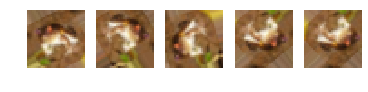

In [55]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
import numpy as np